In [17]:
import numpy as np
import matplotlib.pyplot as plt
from manager import DataManager
from comparator import Indicator, Comparator
import tifffile

%load_ext autoreload
%autoreload 2

y_win = (6000, 7000)
x_win = (9000, 10000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
manager = DataManager(
    origin_csv_fname='/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/input/1996-081_GFM_SS200000954BR_A2_tissue_cleaned_cortex_crop.csv',
    annotation_fname='/Users/brianbrogan/Desktop/KI24/ClusterImgGen2024/STERSEQ/output/01. Co-expression network/1996-081_GFM_SS200000954BR_A2_bin100_tissue_cleaned/Cluster_annotation.csv'
)

In [24]:
indicatorTester = Indicator(
    origin_csv = manager.origin_csv,
    annotation = manager.annotation
    )
indicatorTester.indicators.head()

Finding negative indicators: 100%|██████████| 4/4 [00:01<00:00,  3.16cluster/s]


,geneID,count,cluster,type
0,MT-RNR2,182774,0,pos
1,MT-CO2,42167,0,pos
2,MT-TV,39477,0,pos
3,MT-CO3,39279,0,pos
4,MT-ND1,34312,0,pos


In [25]:
comparatorTester = Comparator(
    indicator = indicatorTester,
    metadata = manager.metadata,
    markers = manager.markers,
    contours = manager.contours
)

In [26]:
#neg_indic_mask = comparatorTester.create_indicator_mask(xrange = x_win, 
#                                                        yrange = y_win,
#                                                        indicators = indicatorTester.create_indicator_dict(indicatorTester.negative_indicators))
indic_mask = comparatorTester.create_indicator_mask(xrange = x_win, 
                                                        yrange = y_win,
                                                        indicators = indicatorTester.create_indicator_dict(indicatorTester.indicators))
print(np.unique(indic_mask))

[-1  0  1]


In [27]:
rgb = comparatorTester.rgb_indicator_mask(indic_mask)

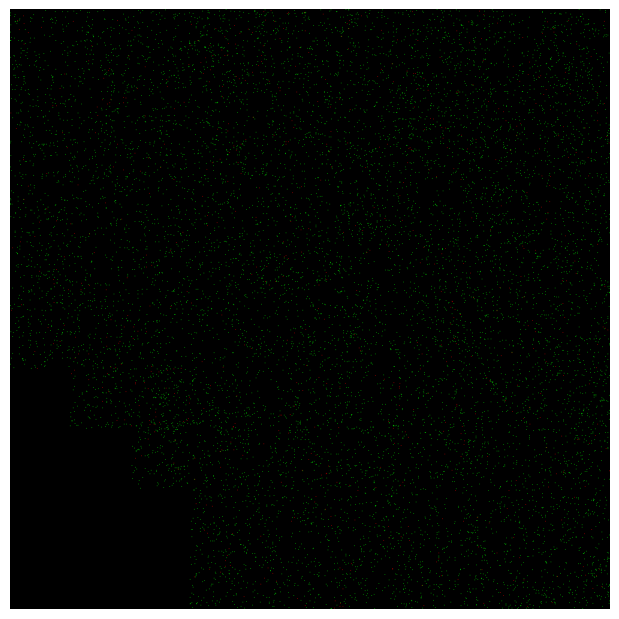

In [29]:
plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(rgb)
plt.axis('off')  # Remove axes

# Save the plot to a TIFF file
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove borders
plt.savefig('/Users/brianbrogan/Desktop/KI24/figures/rgb_indicator_test1.tiff', dpi=100, format='tiff', bbox_inches='tight', pad_inches=0)

# Optionally display the image
plt.show()